<a href="https://colab.research.google.com/github/Dinesh-Kumar-Verma/EDA_Airbnb_Booking_Anlalysis/blob/main/Airbnb_Bookings_Analysis_Capstone_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Airbnb Booking Analysis



##### **Project Type**    - EDA

---


##### **Contribution**    - Individual
##### **By**   - Dinesh Kumar Verma


# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

https://github.com/Dinesh-Kumar-Verma/EDA_Airbnb_Booking_Anlalysis

# **Problem Statement**

**Write Problem Statement Here.**

#### **Define Your Business Objective?**

To help hosts optimize their listings and improve their revenue, and help guests make more informed decisions when booking a stay in NYC, by providing insights into the factors that influence the popularity and pricing of Airbnb listings in the city.

To gain a deeper understanding of the market dynamics and trends, so that the company can use the insights to improve its platform and services, and better meet the needs of its users.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [2]:
# Import Libraries
import numpy as np
import pandas as pd

# Import Data Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import norm

# Import Data Time Library 
from datetime import datetime
import calendar

import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [3]:
# Mount the google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Define the path of the dataset
path = '/content/drive/MyDrive/AlmaBetter/Data_Sets/Airbnb NYC 2019.csv'


In [43]:
# Read the Data Set
df= pd.read_csv(path)

### Dataset First View

In [28]:
# Dataset First Look
df.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

### Dataset Rows & Columns count

In [29]:
# Dataset Rows & Columns count
df.shape

(48895, 16)

### Dataset Information

In [30]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

#### Duplicate Values

In [31]:
# Dataset Duplicate Value Count
#df.duplicated().value_counts()
len(df[df.duplicated()])

0

#### Missing Values/Null Values

In [32]:
# Missing Values/Null Values Count
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

<Axes: >

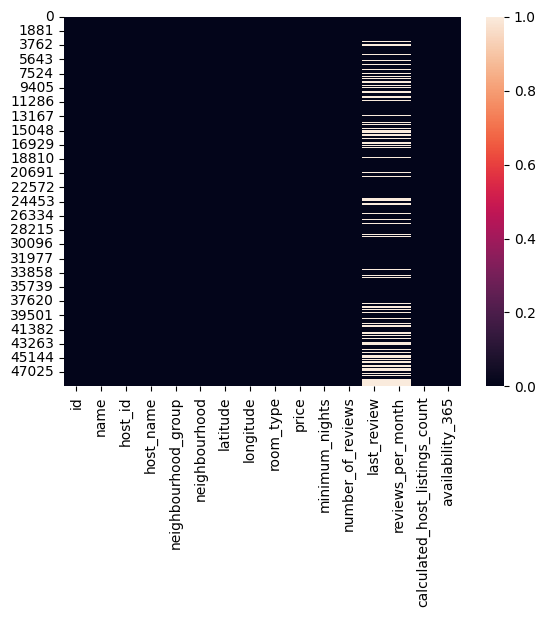

In [33]:
# Visualizing the missing values
sns.heatmap(df.isnull())


### What did you know about your dataset?

Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present more unique, personalized way of experiencing the world. This dataset describes the listing activity and metrics in NYC, NY for 2019.


This data file includes all needed information to find out more about hosts, geographical availability, necessary metrics to make predictions and draw conclusions.


The above dataset has 48895 rows and 16 columns. Ther are no duplicate values. There are 16 nun values in name column, 21 in host_name, and 1052 in last_review and reviews_per_month coumns.

## ***2. Understanding Your Variables***

In [38]:
# Dataset Columns
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [37]:
# Dataset Describe
df.describe()

id       host_id      latitude     longitude         price  \
count  4.889500e+04  4.889500e+04  48895.000000  48895.000000  48895.000000   
mean   1.901714e+07  6.762001e+07     40.728949    -73.952170    152.720687   
std    1.098311e+07  7.861097e+07      0.054530      0.046157    240.154170   
min    2.539000e+03  2.438000e+03     40.499790    -74.244420      0.000000   
25%    9.471945e+06  7.822033e+06     40.690100    -73.983070     69.000000   
50%    1.967728e+07  3.079382e+07     40.723070    -73.955680    106.000000   
75%    2.915218e+07  1.074344e+08     40.763115    -73.936275    175.000000   
max    3.648724e+07  2.743213e+08     40.913060    -73.712990  10000.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    48895.000000       48895.000000       38843.000000   
mean         7.029962          23.274466           1.373221   
std         20.510550          44.550582           1.680442   
min          1.000000           0.000000           0.010000   
25%          1.000000           1.000000           0.190000   
50%          3.000000           5.000000           0.720000   
75%          5.000000          24.000000           2.020000   
max       1250.000000         629.000000          58.500000   

       calculated_host_listings_count  availability_365  
count                    48895.000000      48895.000000  
mean                         7.143982        112.781327  
std                         32.952519        131.622289  
min                          1.000000          0.000000  
25%                          1.000000          0.000000  
50%                          1.000000         45.000000  
75%                          2.000000        227.000000  
max                        327.000000        365.000000

### Variables Description 

* **id              :** Unique ID               
* **name            :** Name of the Listing
* **host_id         :** Unique host_id
* **host_name       :** Name of the host
* **neighbourhood_group :** Location
* **neighbourhood   :** area
* **latitude        :** Lattitude Range
* **longitude       :** Longitude Range
* **room_type       :** Type of Listing
* **price           :** Price of Listing
* **minimum_nights  :** Minimum Nights to be paid for
* **Number_of_reviews :** Number of reviews
* **last_review     :** Content of the last review
* **reviews_per_month :** Number of checks per month
* **calculated_host_listing_count :** Total count
* **availability_365 :** Availability around the year




### Check Unique Values for each variable.

In [39]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
    print("Number of Unique Values in", i, "is ", df[i].nunique(), ".")

Number of Unique Values in id is  48895 .
Number of Unique Values in name is  47905 .
Number of Unique Values in host_id is  37457 .
Number of Unique Values in host_name is  11452 .
Number of Unique Values in neighbourhood_group is  5 .
Number of Unique Values in neighbourhood is  221 .
Number of Unique Values in latitude is  19048 .
Number of Unique Values in longitude is  14718 .
Number of Unique Values in room_type is  3 .
Number of Unique Values in price is  674 .
Number of Unique Values in minimum_nights is  109 .
Number of Unique Values in number_of_reviews is  394 .
Number of Unique Values in last_review is  1764 .
Number of Unique Values in reviews_per_month is  937 .
Number of Unique Values in calculated_host_listings_count is  47 .
Number of Unique Values in availability_365 is  366 .


## 3. ***Data Wrangling***

### Data Wrangling Code

In [44]:
# Write your code to make your dataset analysis ready.
#dropping columns that are not significant or could be unethical to use for our future data exploration and predictions
df.drop(['id','name','host_name','last_review'], axis=1, inplace=True)

In [45]:
#replacing all NaN values in 'reviews_per_month' with 0
df.fillna({'reviews_per_month':0.0}, inplace=True)
df.isnull().sum()

host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [8]:
# Exclude property with listed price of zero
df = df.loc[df.price>0]

### What all manipulations have you done and insights you found?

I have deleted id, name, host_name and last_review columns. Columns "id", "name" and "host_name" are irrelevant and insignificant to our data analysis. "last_review" column is date; if there were no reviews for the listing - date simply will not exist.


I have replaced "reviews_per_month column with 0.0 because there are no checks in thar particular month for that listing.




## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 - Barplot on Top 10 host_id (Univariate)

In [ ]:
# Chart - 1 visualization code
# Top 10 host
top_host = df['host_id'].value_counts().head(10)
top_host

219517861    327
107434423    232
30283594     121
137358866    103
12243051      96
16098958      96
61391963      91
22541573      87
200380610     65
7503643       52
Name: host_id, dtype: int64

[Text(0, 0, '7503643'),
 Text(1, 0, '12243051'),
 Text(2, 0, '16098958'),
 Text(3, 0, '22541573'),
 Text(4, 0, '30283594'),
 Text(5, 0, '61391963'),
 Text(6, 0, '107434423'),
 Text(7, 0, '137358866'),
 Text(8, 0, '200380610'),
 Text(9, 0, '219517861')]

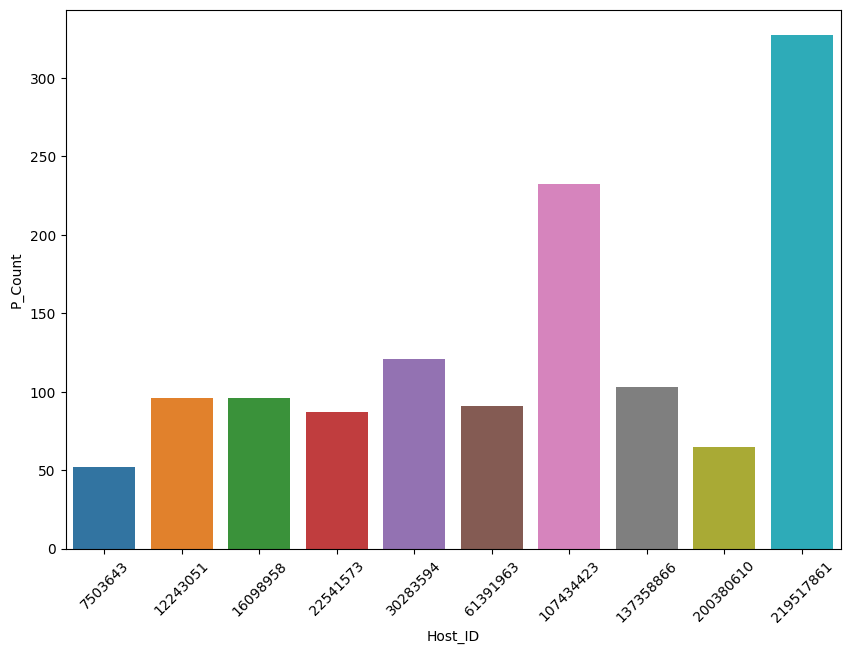

In [ ]:
top_host_df=pd.DataFrame(top_host)
top_host_df.reset_index(inplace=True)
top_host_df.rename(columns={'index':'Host_ID', 'host_id':'P_Count'}, inplace=True)
plt.rcParams['figure.figsize'] = (10,7)
ax=sns.barplot(x = "Host_ID", y= "P_Count", data= top_host_df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

##### 1. Why did you pick the specific chart?

Bar graphs are useful for presenting and comparing categorical or discrete data. They allow for easy comparison between different categories or groups, and can be used to identify trends or patterns in the data.

So, for comparing the Host_id with their value counts, I used it.

##### 2. What is/are the insight(s) found from the chart?



1. We can see that there is a good distribution between top 10 hosts with the most listings.

2. First host has more than 300+ listings.



##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2 - Pie Chart on Neighbourhood Group (Univariate)

<Axes: ylabel='neighbourhood_group'>

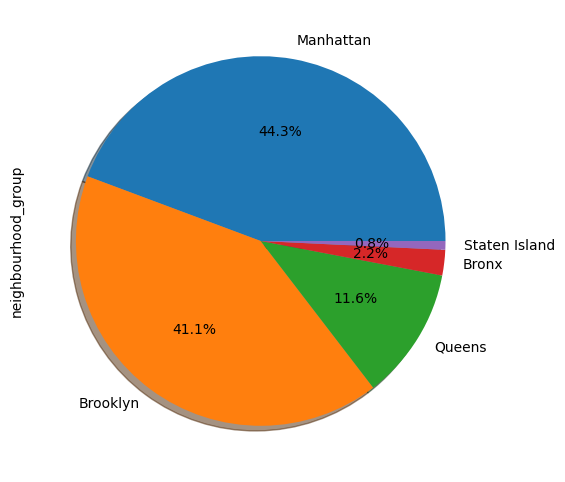

In [ ]:
# Chart - 2 visualization code
# Pie chart to visualize the distribution of the 'neighbourhood_group'
df['neighbourhood_group'].value_counts().plot(kind='pie',
                              figsize=(15,6),autopct="%1.1f%%",startangle=0, shadow= True)

##### 1. Why did you pick the specific chart?

A pie chart expresses a part-to-whole relationship in your data. It's easy to explain the percentage comparison through area covered in a circle with different colors. Where differenet percentage comparison comes into action pie chart is used frequently. So, I used Pie chart and which helped me to get the percentage comparision of the dependant variable

##### 2. What is/are the insight(s) found from the chart?

From the above chart I got to know that, there are 44.3 % listing in Manhattan followed by the 41.1 % Brooklyn, 11.6 % Queens, 2.2 % Bronx and 0.8 % Staten Island.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Based on the observation that there are 44.3% listings in Manhattan followed by 41.1% in Brooklyn, it is likely that Airbnb hosts in these areas will experience higher levels of competition. This could make it more difficult for hosts to attract guests and may result in lower occupancy rates or lower prices to remain competitive.

On the other hand, hosts in areas with fewer listings, such as Queens, the Bronx, and Staten Island, may have an advantage as there is likely to be less competition. These hosts may be able to charge higher prices or maintain higher occupancy rates due to the relative scarcity of listings in these areas.

#### Chart - 3 - Top 10 Neighbourhood and Bottom 10 Neighbourhood (Univariate)

Text(0.5, 1.0, 'Bottom 10 Neighbourhood')

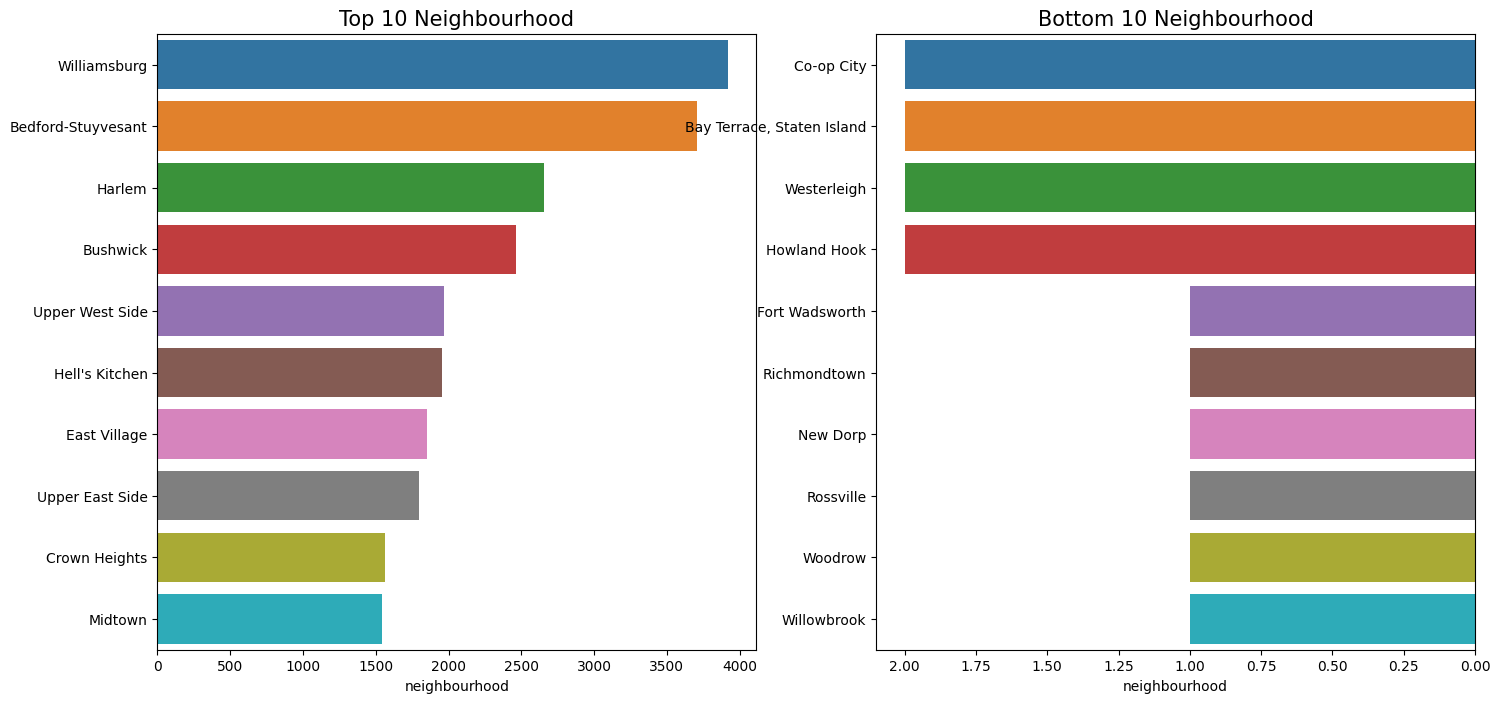

In [ ]:
# Top 10 Neighbourhood and Bottom 10 Neighbourhood
plt.figure(figsize = (17,8))

plt.subplot(1,2,1)
sns.barplot(data = df, y = df['neighbourhood'].value_counts().iloc[:10].keys(), 
            x = df['neighbourhood'].value_counts().iloc[:10])
plt.title("Top 10 Neighbourhood", fontsize = 15)

plt.subplot(1,2,2)
sns.barplot(data = df, y = df['neighbourhood'].value_counts().tail(10).keys(), 
            x = df['neighbourhood'].value_counts().tail(10)).invert_xaxis()
plt.title("Bottom 10 Neighbourhood", fontsize = 15)

In [ ]:
print(df['neighbourhood'].value_counts().head(10), '\n')
print(df['neighbourhood'].value_counts().tail(10))

Williamsburg          3919
Bedford-Stuyvesant    3710
Harlem                2658
Bushwick              2462
Upper West Side       1971
Hell's Kitchen        1958
East Village          1853
Upper East Side       1798
Crown Heights         1564
Midtown               1545
Name: neighbourhood, dtype: int64 

Co-op City                    2
Bay Terrace, Staten Island    2
Westerleigh                   2
Howland Hook                  2
Fort Wadsworth                1
Richmondtown                  1
New Dorp                      1
Rossville                     1
Woodrow                       1
Willowbrook                   1
Name: neighbourhood, dtype: int64


##### 2. What is/are the insight(s) found from the chart?

* Williamsburg has most number of the listings followed by the Bedford-Stuyvesant.

* Fort Wadsworth, Woodrow, Rossville, New Dorp, Richmondtown and Fort Wadsworth have minimum number of listings only one.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The concentration of Airbnb listings in the top 10 New York City neighborhoods could have both positive and negative business impacts. Hosts in popular neighborhoods may face more competition, while travelers may benefit from more options. Airbnb may need to focus on ensuring hosts adhere to local regulations and community standards and consider ways to attract hosts in areas with fewer listings. The impact will depend on factors such as market demand and Airbnb's policies, but it is clear that Airbnb activity can have significant impacts on hosts, travelers, and the platform.

####Chart - 4 - Pie Char on Room Type (Univariate)

<Axes: ylabel='room_type'>

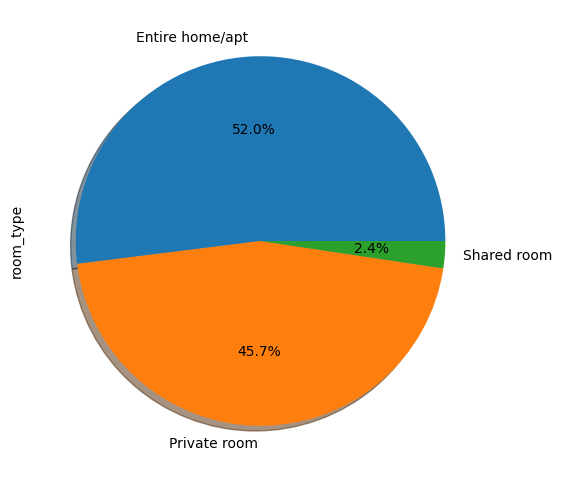

In [ ]:
# Chart - 3 visualization code
df['room_type'].value_counts().plot(kind='pie',
                              figsize=(15,6),autopct="%1.1f%%",startangle=0, shadow= True)

##### 1. Why did you pick the specific chart?

A pie chart helps organize and show data as a percentage of a whole. True to the name, this kind of visualization uses a circle to represent the whole, and slices of that circle, or “pie”, to represent the specific categories that compose the whole.

##### 2. What is/are the insight(s) found from the chart?

There are 52.0 % listing of Entire home/Apartment, 45.7 % of Private Room and 2.4 % of Shared room.
From the above observation, Most of the hosts prefer to rent the Entire Home/Apartment and Private room and not to prefer rent share room.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Hosts who offer entire homes/apartments may be able to charge higher prices, while Airbnb may need to focus on marketing strategies to encourage more hosts to offer private rooms or shared rooms. Additionally, Airbnb may need to consider ways to ensure positive experiences for guests who book shared rooms to maintain the platform's reputation. Overall, the business impact of these observations will depend on a variety of factors, including pricing, demand, and marketing strategies.

#### Chart - 5- Distplot on Numerical Columns (Univariate)

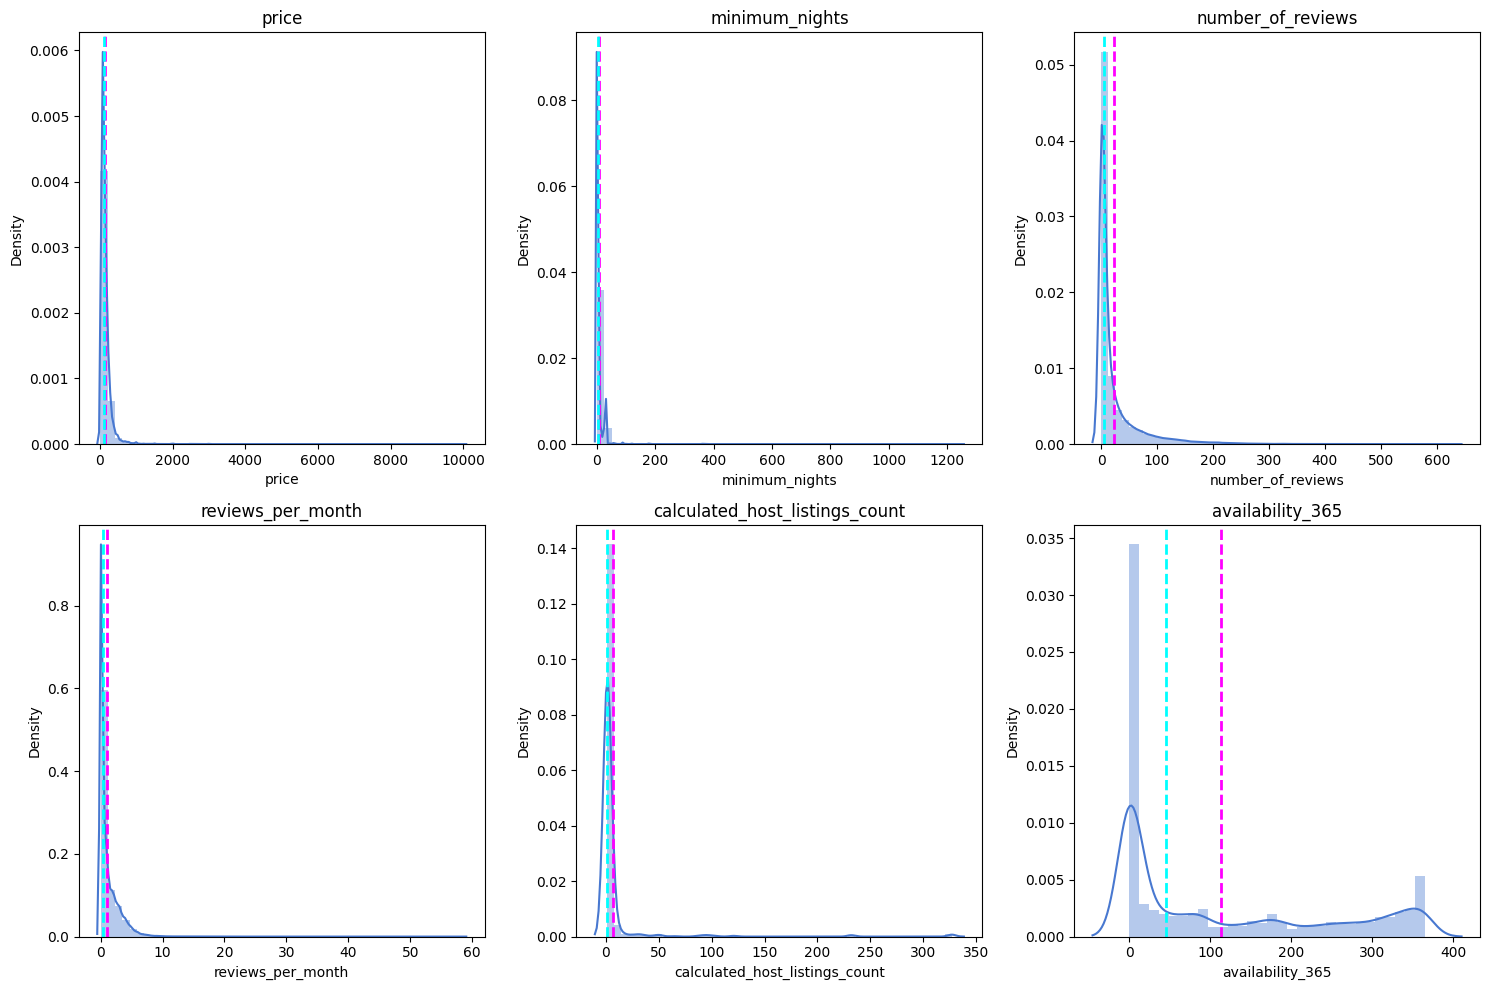

In [ ]:
feature = ['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# flatten the axs array to iterate over it with a single loop
axs = axs.flatten()

for i, col in enumerate(feature):
    sns.distplot(df[col], ax=axs[i])
    axs[i].axvline(df[col].mean(),color='magenta', linestyle='dashed', linewidth=2)
    axs[i].axvline(df[col].median(),color='cyan', linestyle='dashed', linewidth=2)
    axs[i].set_title(col)

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A distplot is a function in the Seaborn data visualization library that combines a histogram with a kernel density estimation (KDE) plot. The resulting distplot shows the distribution of data as a smooth curve, with the area under the curve indicating the proportion of the data in a given range of values.

Thus, I used the distplot to analysis the variable distributions over the whole dataset whether it's symmetric or not.

##### 2. What is/are the insight(s) found from the chart?

All the columns are right skewed.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6 - Boxplot on Numerical Columns (Univariate)

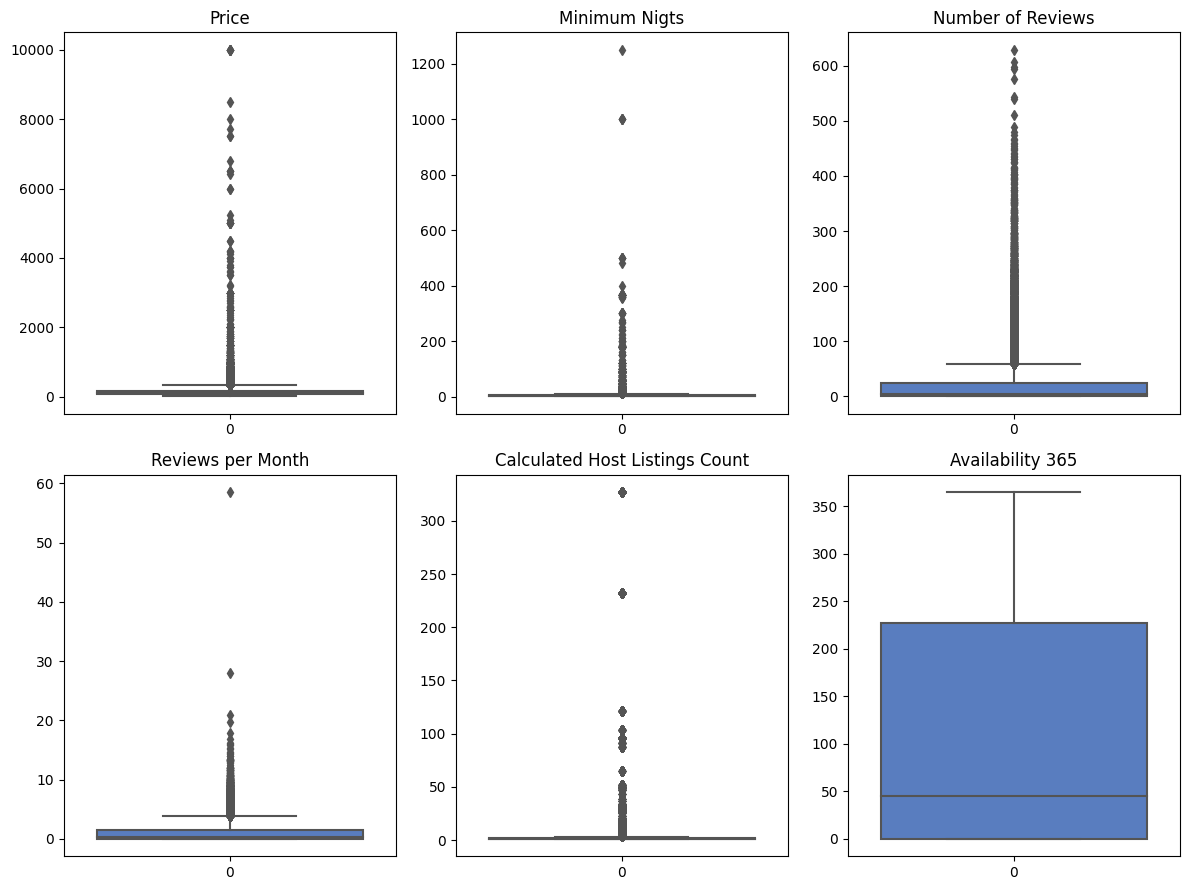

In [ ]:
# Plotting boxplot for numerical columns
sns.set_palette("muted")
from pylab import *
f,ax = plt.subplots(figsize=(12,9))

subplot(2,3,1)
sns.boxplot(df['price'])
plt.title("Price")

subplot(2,3,2)
sns.boxplot(df['minimum_nights'])
plt.title("Minimum Nigts")

subplot(2,3,3)
sns.boxplot(df['number_of_reviews'])
plt.title('Number of Reviews')

subplot(2,3,4)
sns.boxplot(df['reviews_per_month'])
plt.title("Reviews per Month")

subplot(2,3,5)
sns.boxplot(df['calculated_host_listings_count'])
plt.title("Calculated Host Listings Count")

subplot(2,3,6)
sns.boxplot(df['availability_365'])
plt.title("Availability 365")

plt.tight_layout() # avoid overlap of plots
plt.show()


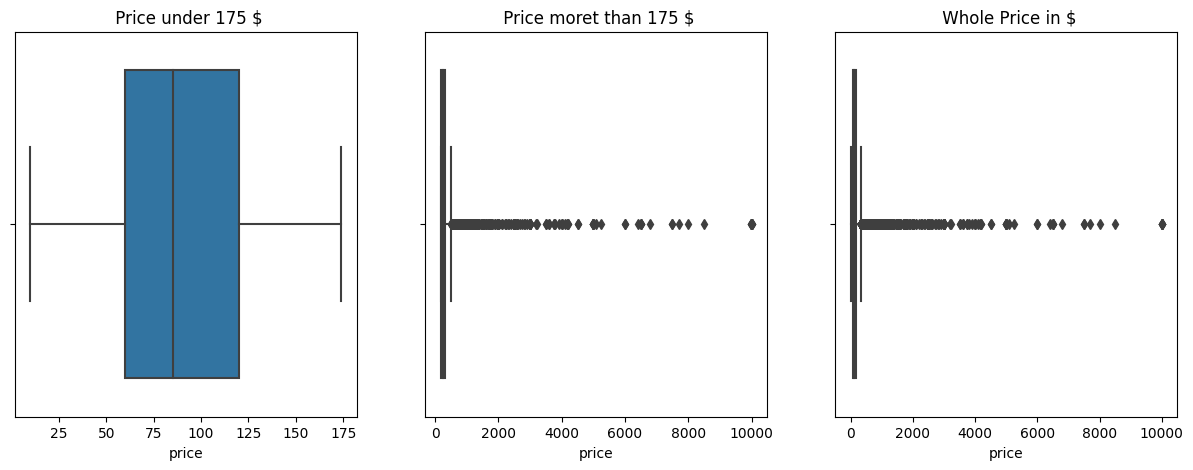

In [ ]:
# Additional Boxplot on Price Coloumn because Price is not unifomly distributed.
f,axs = plt.subplots(ncols=3, figsize=(15,5))

sns.boxplot(x= 'price', data= df.loc[df['price']<175], ax= axs[0])
axs[0].set_title(" Price under 175 $")
sns.boxplot(x= 'price', data= df.loc[df['price']>175], ax=axs[1])
axs[1].set_title(" Price moret than 175 $")
sns.boxplot(x= 'price', data= df, ax= axs[2])
axs[2].set_title(" Whole Price in $")

plt.show()

In [ ]:
df['price'].describe()

count    48884.000000
mean       152.755053
std        240.170260
min         10.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

##### 1. Why did you pick the specific chart?

Box plots are used to show distributions of numeric data values, especially when you want to compare them between multiple groups. They are built to provide high-level information at a glance, offering general information about a group of data's symmetry, skew, variance, and outliers.

Thus, for each numerical varibale in the given dataset, I used box plot to analyse the outliers and interquartile range including mean, median, maximum and minimum value.

##### 2. What is/are the insight(s) found from the chart



All the columns are right skewed.


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7 - Price of the properties by the Room Type (Bivariate)

Text(0.5, 0.98, 'Price by the room type')

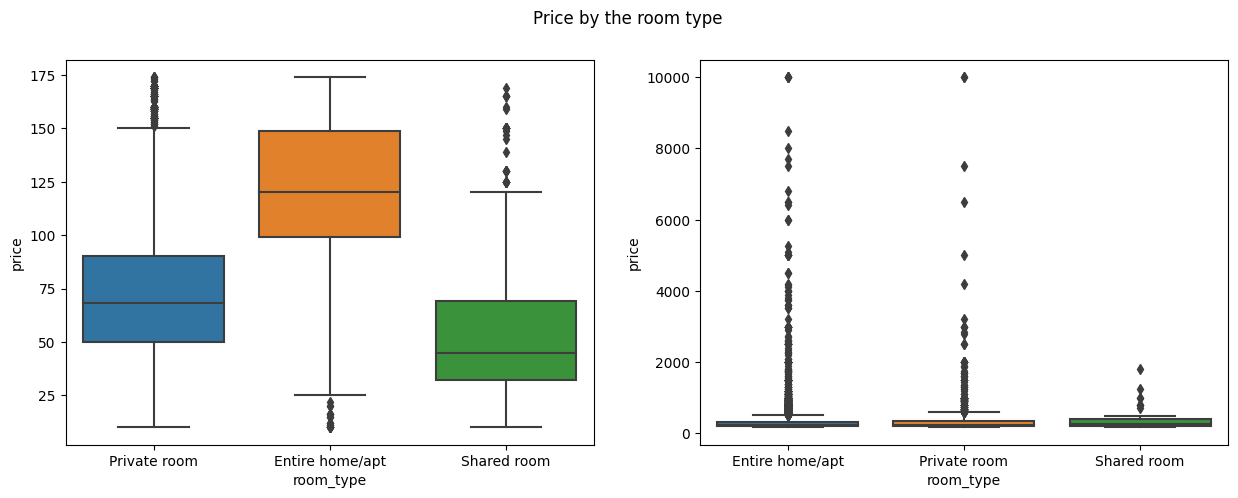

In [ ]:
# Chart - 6 visualization code
fig, axs = plt.subplots(ncols = 2, figsize= (15,5))
sns.boxplot(x= 'room_type', y = 'price', data = df.loc[df['price']<175], ax= axs[0])
sns.boxplot(x= 'room_type', y = 'price', data = df.loc[df['price']>175], ax= axs[1])
fig.suptitle("Price by the room type")

In [ ]:
# Calcuating the exa delete it
df_agg = df.groupby('room_type')['price'].agg(['median', 'mean', 'max', 'min'])
df_agg = df_agg.reset_index()
df_agg.columns = ['room_type', 'median_price', 'mean_price', 'max_price', 'min_price']
pd.DataFrame(df_agg)

room_type  median_price  mean_price  max_price  min_price
0  Entire home/apt         160.0  211.810918      10000         10
1     Private room          70.0   89.809131      10000         10
2      Shared room          45.0   70.248705       1800         10

##### 1. Why did you pick the specific chart?

Box plots are used to show distributions of numeric data values, especially when you want to compare them between multiple groups. They are built to provide high-level information at a glance, offering general information about a group of data's symmetry, skew, variance, and outliers.

Thus, for price and room_type columns, I used box plot to analyse the outliers and interquartile range including mean, median, maximum and minimum value.



##### 2. What is/are the insight(s) found from the chart?

Since the price data is not unoformly distributed so median price will be the good estimator for average.
* Entire Home/Apartment is more costly than the Private room and shared is room is cheaper than two.
* Minimum price is 10  for every room type.
* Maximum price is 10000 for Entire home/apartment and 1800 for shared room.
* There are only few listing that have higher prices.



##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8- Price per Neighbourhood Group (Bivariate)

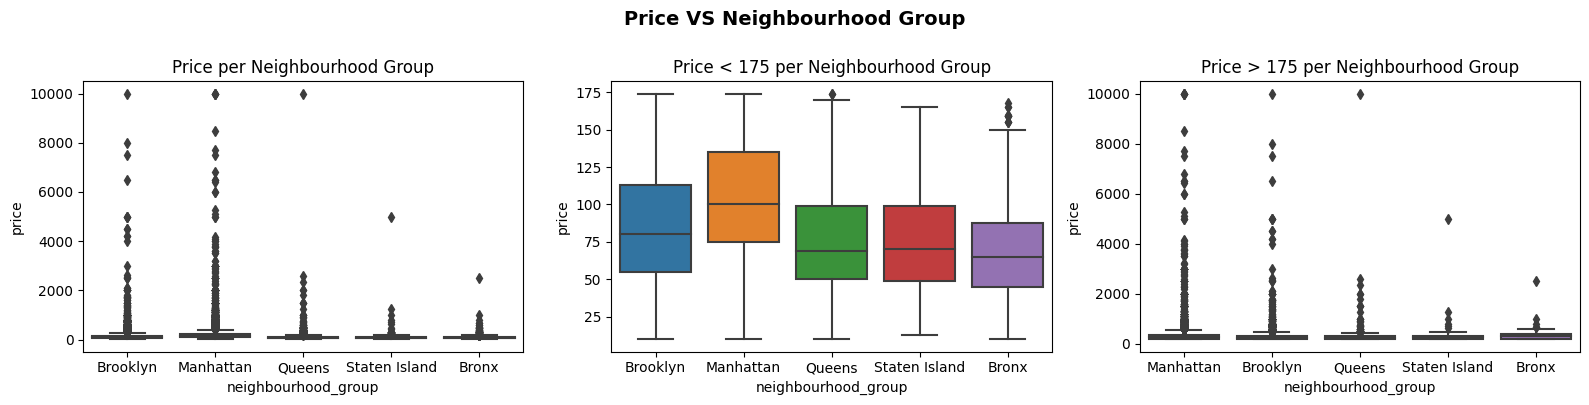

In [ ]:
# Chart - 7 visualization code
fig, axs = plt.subplots(ncols= 3, figsize= (16,4))
# Price vs Neighbourhood group 
sns.boxplot(x= 'neighbourhood_group', y = 'price', data = df, ax= axs[0])
axs[0].set_title("Price per Neighbourhood Group")
# Price <175$ vs Neighbourhood group
sns.boxplot(x= 'neighbourhood_group', y = 'price', data = df.loc[df['price']<175], ax= axs[1])
axs[1].set_title("Price < 175 per Neighbourhood Group")
# Price >175$ vs Neighbourhood group
sns.boxplot(x= 'neighbourhood_group', y = 'price', data = df.loc[df['price']>175], ax= axs[2])
axs[2].set_title("Price > 175 per Neighbourhood Group")
# Set a title for the overall figure
fig.suptitle("Price VS Neighbourhood Group", fontsize=14, fontweight='bold', y=1)

# Adjust spacing between plots
plt.tight_layout()


Text(0.5, 1.0, 'Median Price per Neighbourhood Group')

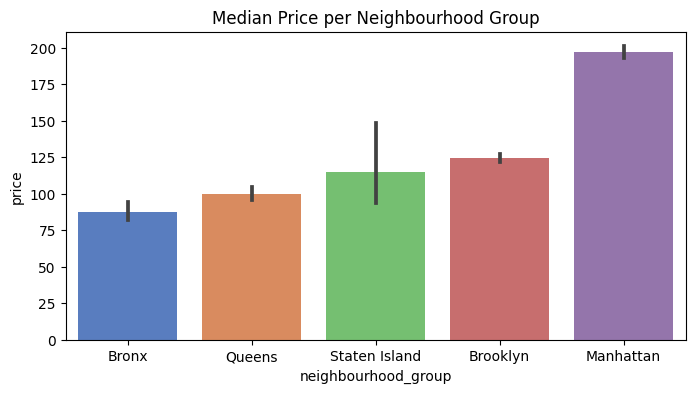

In [ ]:
# alternative visualization of median less impacted by the extreme value
plt.figure(figsize= (8,4))
median_order = df.groupby(["neighbourhood_group"])['price'].aggregate(np.median).reset_index().sort_values('price')
sns.barplot(x='neighbourhood_group', y="price", data = df, order=median_order['neighbourhood_group'])
plt.title('Median Price per Neighbourhood Group')

In [ ]:
pd.DataFrame(df.groupby('neighbourhood_group').agg(['median', 'mean', 'max', 'min'])['price'])

median        mean    max  min
neighbourhood_group                                
Bronx                  65.0   87.577064   2500   10
Brooklyn               90.0  124.438915  10000   10
Manhattan             150.0  196.884903  10000   10
Queens                 75.0   99.517649  10000   10
Staten Island          75.0  114.812332   5000   13

##### 2. What is/are the insight(s) found from the chart?

* The average price of Manhattan is higher followed by the Brooklyn.
* The average price of Bronx is mininimum followed by the Queens.
* So, The Manhattan is the costlier location and Bronx is the cheapest location.
* Bronx maximum price is only 2500 $ but other locations price is 2 times to 4 times.


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9 - Price per Neighbourhood Group by their room type (Multivariate)

<Axes: xlabel='neighbourhood_group', ylabel='price'>

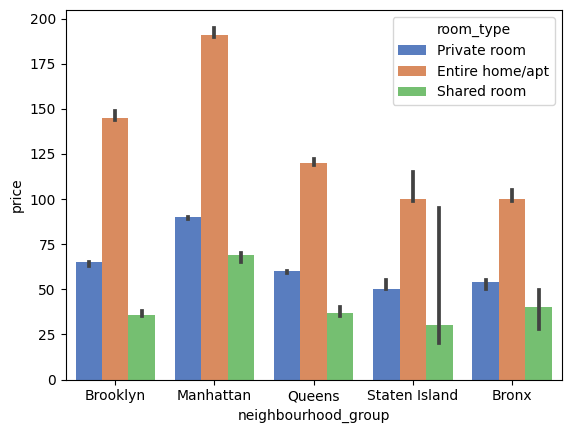

In [ ]:
sns.barplot(x= 'neighbourhood_group', y= 'price', hue = 'room_type', data = df, estimator ='median')

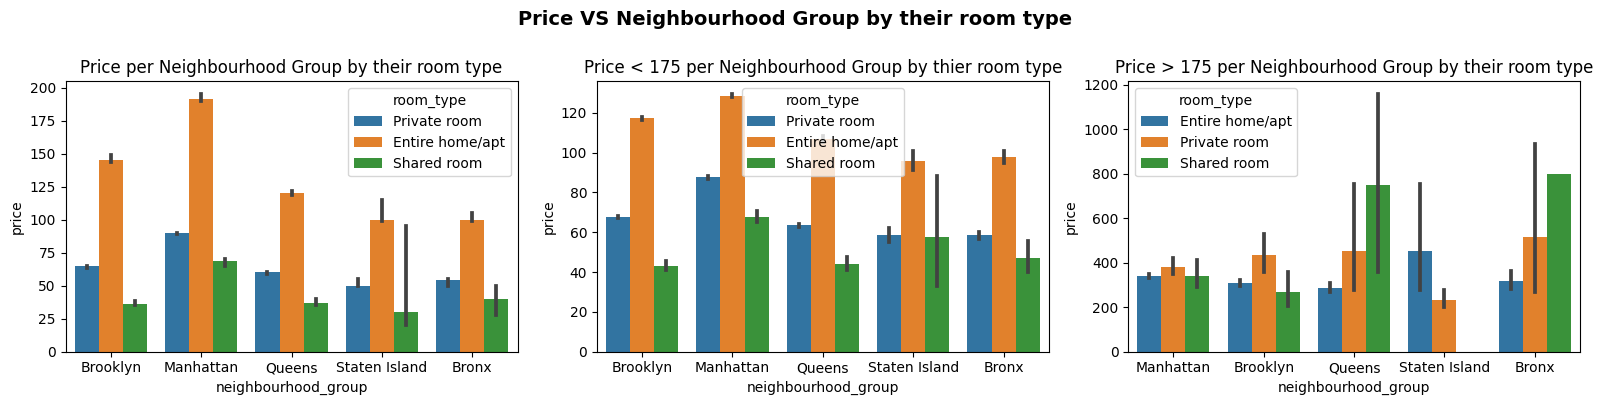

In [ ]:
# Chart - 7 visualization code
fig, axs = plt.subplots(ncols= 3, figsize= (16,4))
# Price vs Neighbourhood group 
sns.barplot(x= 'neighbourhood_group', y = 'price', hue = 'room_type', estimator = 'median', data = df, ax= axs[0])
axs[0].set_title("Price per Neighbourhood Group by their room type")
# Price <175$ vs Neighbourhood group
sns.barplot(x= 'neighbourhood_group', y = 'price', hue = 'room_type', data = df.loc[df['price']<175], ax= axs[1])
axs[1].set_title("Price < 175 per Neighbourhood Group by thier room type")
# Price >175$ vs Neighbourhood group
sns.barplot(x= 'neighbourhood_group', y = 'price', hue = 'room_type', data = df.loc[df['price']>175], ax= axs[2])
axs[2].set_title("Price > 175 per Neighbourhood Group by their room type")
# Set a title for the overall figure
fig.suptitle("Price VS Neighbourhood Group by their room type", fontsize=14, fontweight='bold', y=1)

# Adjust spacing between plots
plt.tight_layout()

In [ ]:
summary = df.groupby("neighbourhood_group")["price"].describe()[["25%", "50%", "75%", "mean"]]
pd.DataFrame(summary)

25%    50%    75%        mean
neighbourhood_group                                
Bronx                45.0   65.0   99.0   87.577064
Brooklyn             60.0   90.0  150.0  124.438915
Manhattan            95.0  150.0  220.0  196.884903
Queens               50.0   75.0  110.0   99.517649
Staten Island        50.0   75.0  110.0  114.812332

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

* Manhattan is costlier for all room types.
* Sheared room is not avialable in Staten Island above price of 175 dollar.
* Below 175 dollar entire Home or apt average price is high and above 175 dollar  shared room priecs is high.
* Above 175 $ average price of Bronx for shared room and private room is high.



##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10 - Price Relation to the number of reviews (Bivariate)

Text(0.5, 1.1, 'Price relation to number of reviews for Properties more than $175')

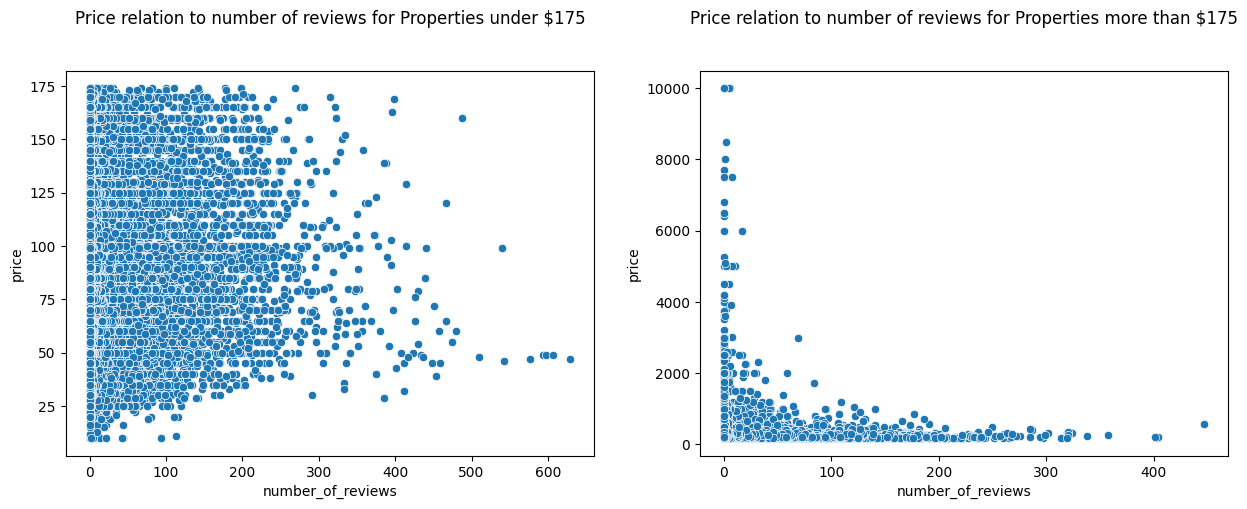

In [ ]:
# Chart - 8 visualization code
# Price relation to the number of review per month
fig, axs = plt.subplots(ncols = 2, figsize= (15,5))
sns.scatterplot(x= 'number_of_reviews', y = 'price', data = df.loc[df['price']<175], ax= axs[0])
axs[0].set_title('Price relation to number of reviews for Properties under $175', y=1.1)
sns.scatterplot(x= 'number_of_reviews', y = 'price', data = df.loc[df['price']>175], ax= axs[1])
axs[1].set_title('Price relation to number of reviews for Properties more than $175', y= 1.1)


Text(0.5, 1.0, 'Price relation to number of reviews')

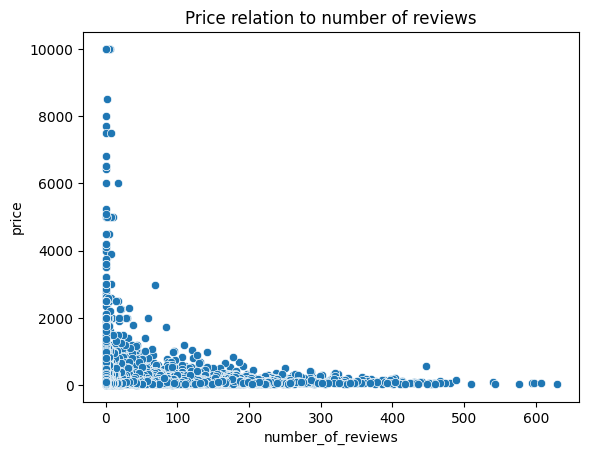

In [ ]:
sns.scatterplot(x= 'number_of_reviews', y= 'price', data = df)
plt.title("Price relation to number of reviews")

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

 Considering 75 % listings lies under price of 175 $ -
 * Ther are only few listngs that have more than 300 reviews.
 * The listings whose prices are higher have minimum number of reviews.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here


#### Chart - 11 - Price relation to the Minimun Nights (Bivariate)

Text(0.5, 1.0, 'Price Relation to minimum_nights more than 175 $')

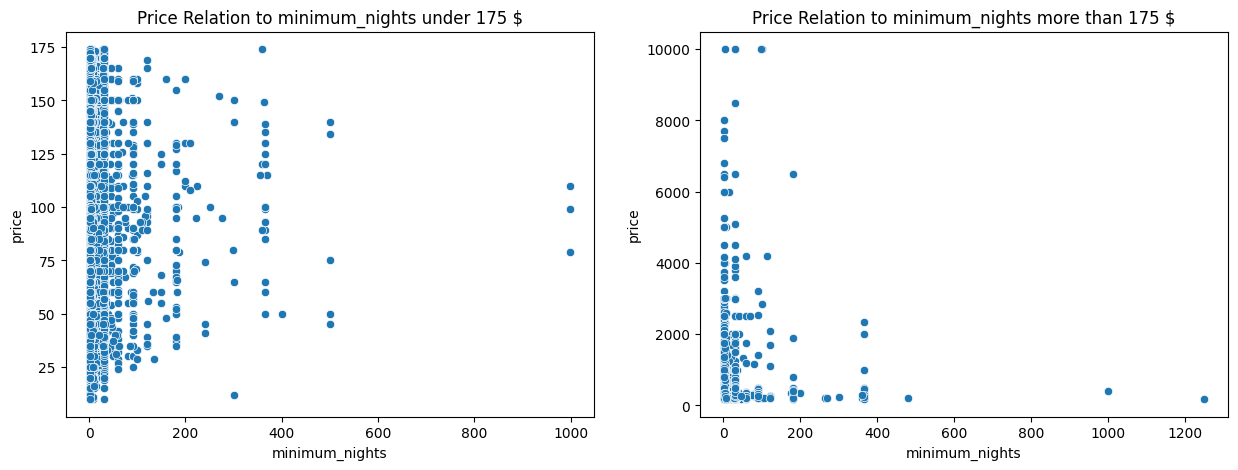

In [ ]:
# Chart - 9 visualization code
fig, axs = plt.subplots(ncols = 2, figsize= (15,5))
sns.scatterplot(x= 'minimum_nights', y = 'price', data = df.loc[df['price']<175], ax= axs[0])
axs[0].set_title("Price Relation to minimum_nights under 175 $")
sns.scatterplot(x= 'minimum_nights', y = 'price', data = df.loc[df['price']>175], ax= axs[1])
axs[1].set_title("Price Relation to minimum_nights more than 175 $")
#fig.suptitle("Price by the Minimum Nights")

In [ ]:
pd.DataFrame(df.loc[df['minimum_nights']>500,'minimum_nights']).reset_index()

index  minimum_nights
0   2854            1000
1   5767            1250
2  13404             999
3  26341             999
4  38664             999

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

* There are a lot of listings under 175 $.
* There are only 5 listings whose minimum nights are greater than 500.
* There are no specific trends about the prices according to minimum nights.
* Higher minimum_nights don't affecting the prices means if guests want to live for longer the prices will not be cheap.


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12- Price relation to the reviews per month (Bivariate)

Text(0.5, 1.1, 'Price relation to the reviews per month for Properties more than $175')

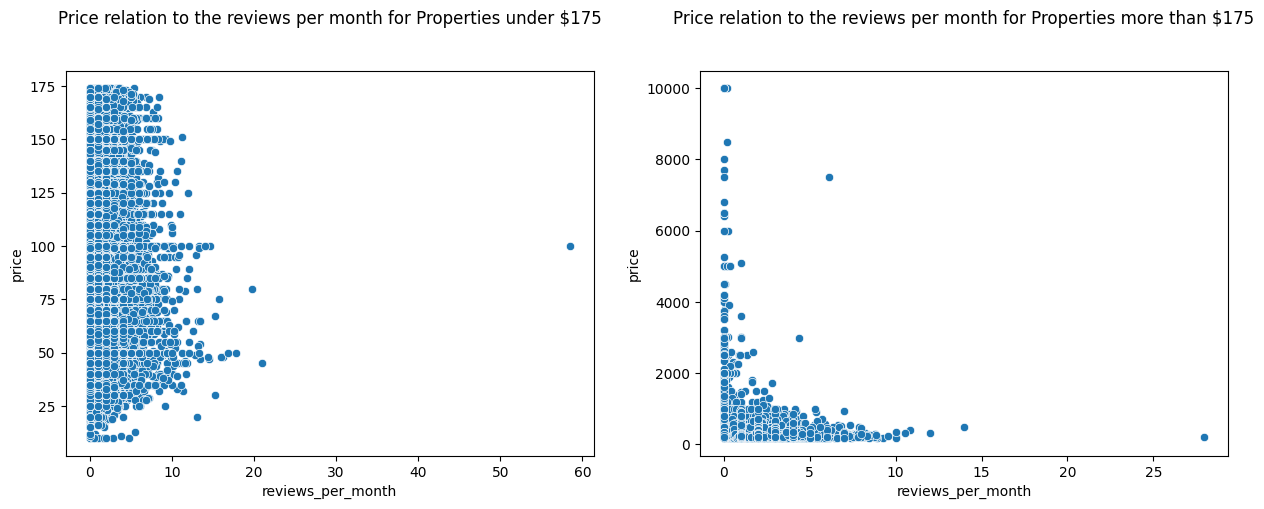

In [ ]:
# Chart - 10 visualization code
fig, axs = plt.subplots(ncols = 2, figsize= (15,5))
sns.scatterplot(x= 'reviews_per_month', y = 'price', data = df.loc[df['price']<175], ax= axs[0])
axs[0].set_title('Price relation to the reviews per month for Properties under $175', y=1.1)
sns.scatterplot(x= 'reviews_per_month', y = 'price', data = df.loc[df['price']>175], ax= axs[1])
axs[1].set_title('Price relation to the reviews per month for Properties more than $175', y= 1.1)


##### 1. Why did you pick the specific chart?

##### 2. What is/are the insight(s) found from the chart?

* There are only few listing whose reviews per month is between 10 to 20 under 175 $.
* There are a lot of listing whose reviews per month is zero.
* The higher preices have minimum reviews per month.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

#### Chart - 13 - Price relation to availability_365 (Bivariate)

Text(0.5, 1.1, 'Price relation to availability_365 for Properties more than $175')

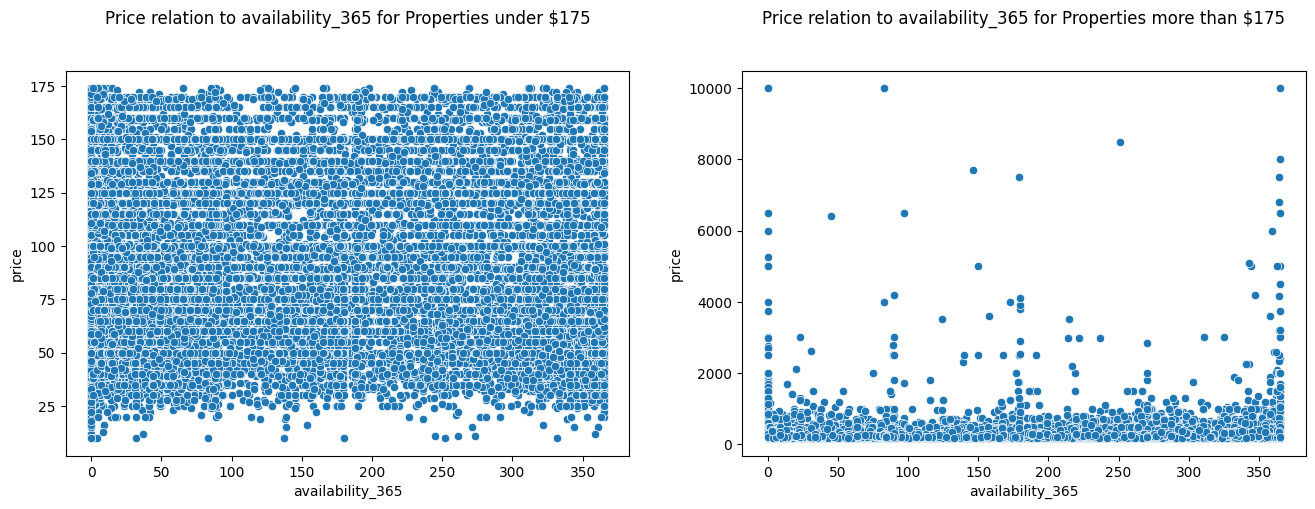

In [ ]:
# Chart - 12 visualization code
fig, axs = plt.subplots(ncols = 2, figsize= (16,5))
sns.scatterplot(x= 'availability_365', y = 'price', data = df.loc[df['price']<175], ax= axs[0])
axs[0].set_title('Price relation to availability_365 for Properties under $175', y=1.1)
sns.scatterplot(x= 'availability_365', y = 'price', data = df.loc[df['price']>175], ax= axs[1])
axs[1].set_title('Price relation to availability_365 for Properties more than $175', y= 1.1)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

* Below 175 dollar and greater than 25 dollar the rooms are availble around the year but above 175 dollar very few rooms are available around the year.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Room Type Location per Neighbourhood Group (Bivariate)

Text(0.5, 1.05, 'Room type location per Neighbourhood Group')

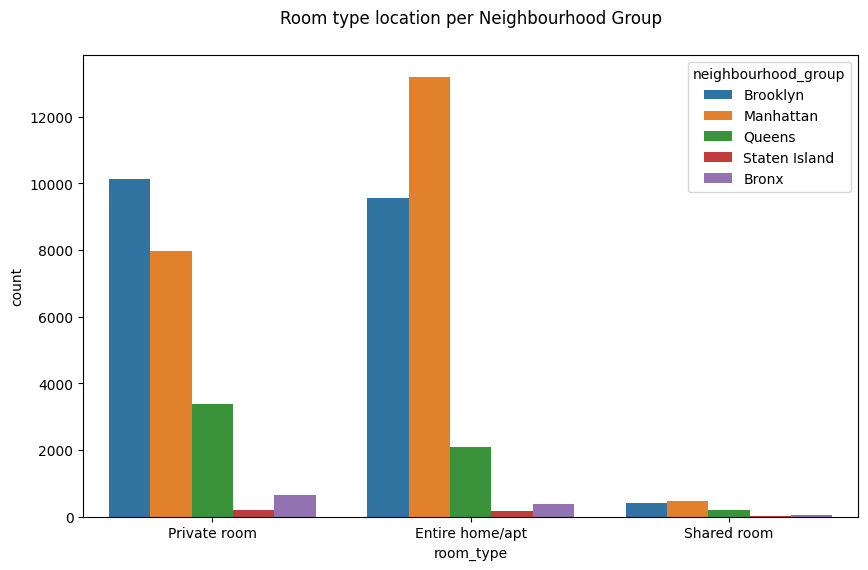

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x='room_type', hue= 'neighbourhood_group', data= df)
plt.title("Room type location per Neighbourhood Group", y= 1.05)


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

* Manhattan has the maximum number of listings for entire homes/apartments and shared room, while Staten Island has the minimum number of listings."
* Brooklyn has the maximum number of listings for private room, while Staten Island has the minimum number of listings.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 15 - Room Type Location per Neighbourhood Group (Bivariate)

<Axes: xlabel='longitude', ylabel='latitude'>

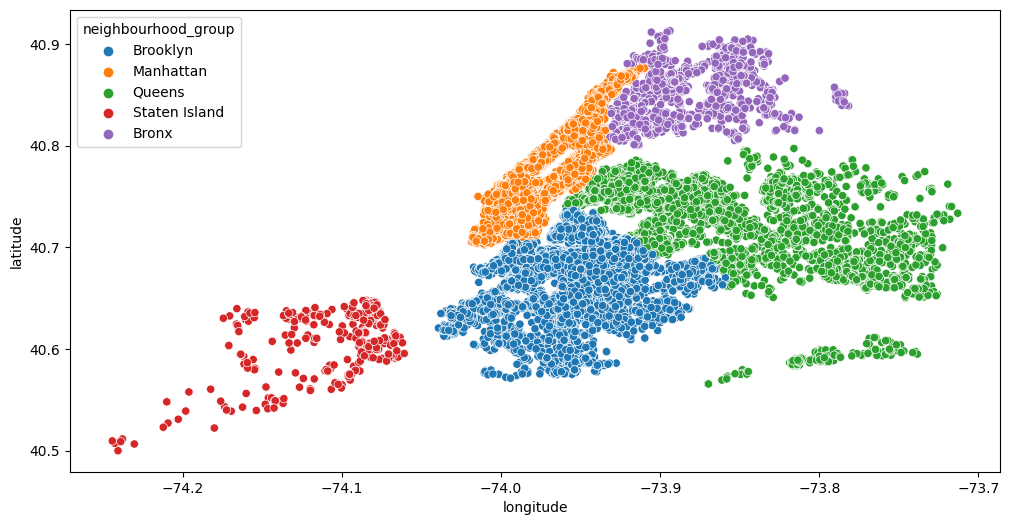

In [13]:
# Chart - 13 visualization code
plt.figure(figsize= (12,6))
sns.scatterplot(x='longitude', y='latitude', hue ='neighbourhood_group', data = df)

<Axes: ylabel='neighbourhood_group'>

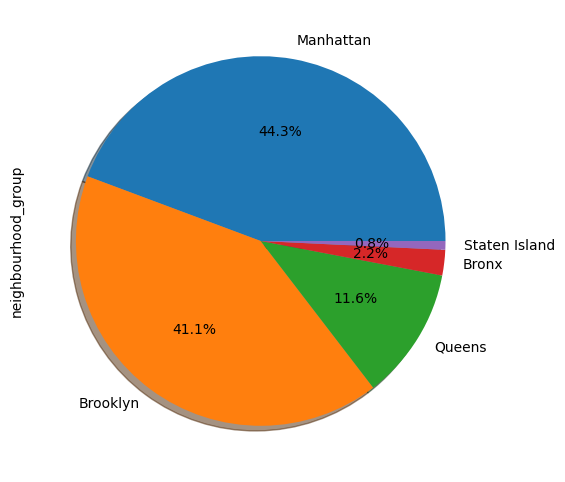

In [15]:
# using previous visulization for the deeper insights.
df['neighbourhood_group'].value_counts().plot(kind='pie',
                              figsize=(15,6),autopct="%1.1f%%",startangle=0, shadow= True)

##### 1. Why did you pick the specific chart?

Answer Here

##### 2. What is/are the insight(s) found from the chart?

* Queens has more area than the other location but it has only 11.6 % lisitngs.
* Manhattan has smallest area but has maximum number of listings.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 16 - Correlation Heatmap

<Axes: >

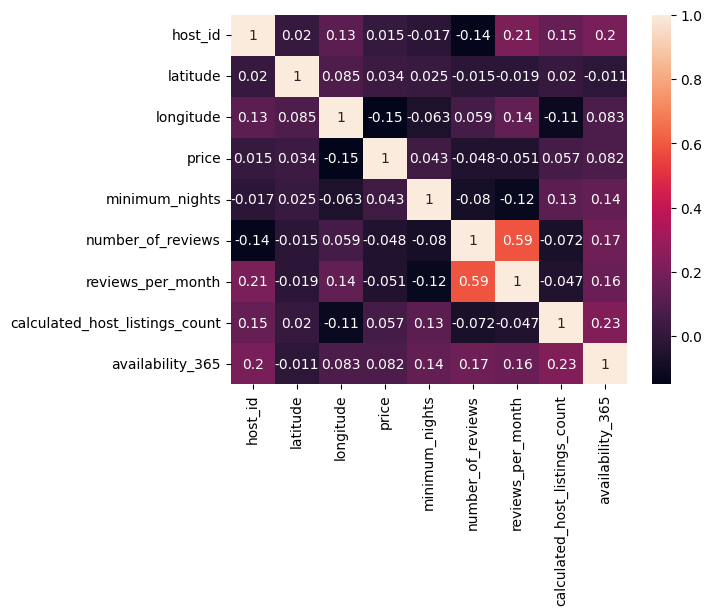

In [ ]:
# Correlation Heatmap visualization code
sns.heatmap(df.corr(), annot= True)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 17 - Pair Plot 

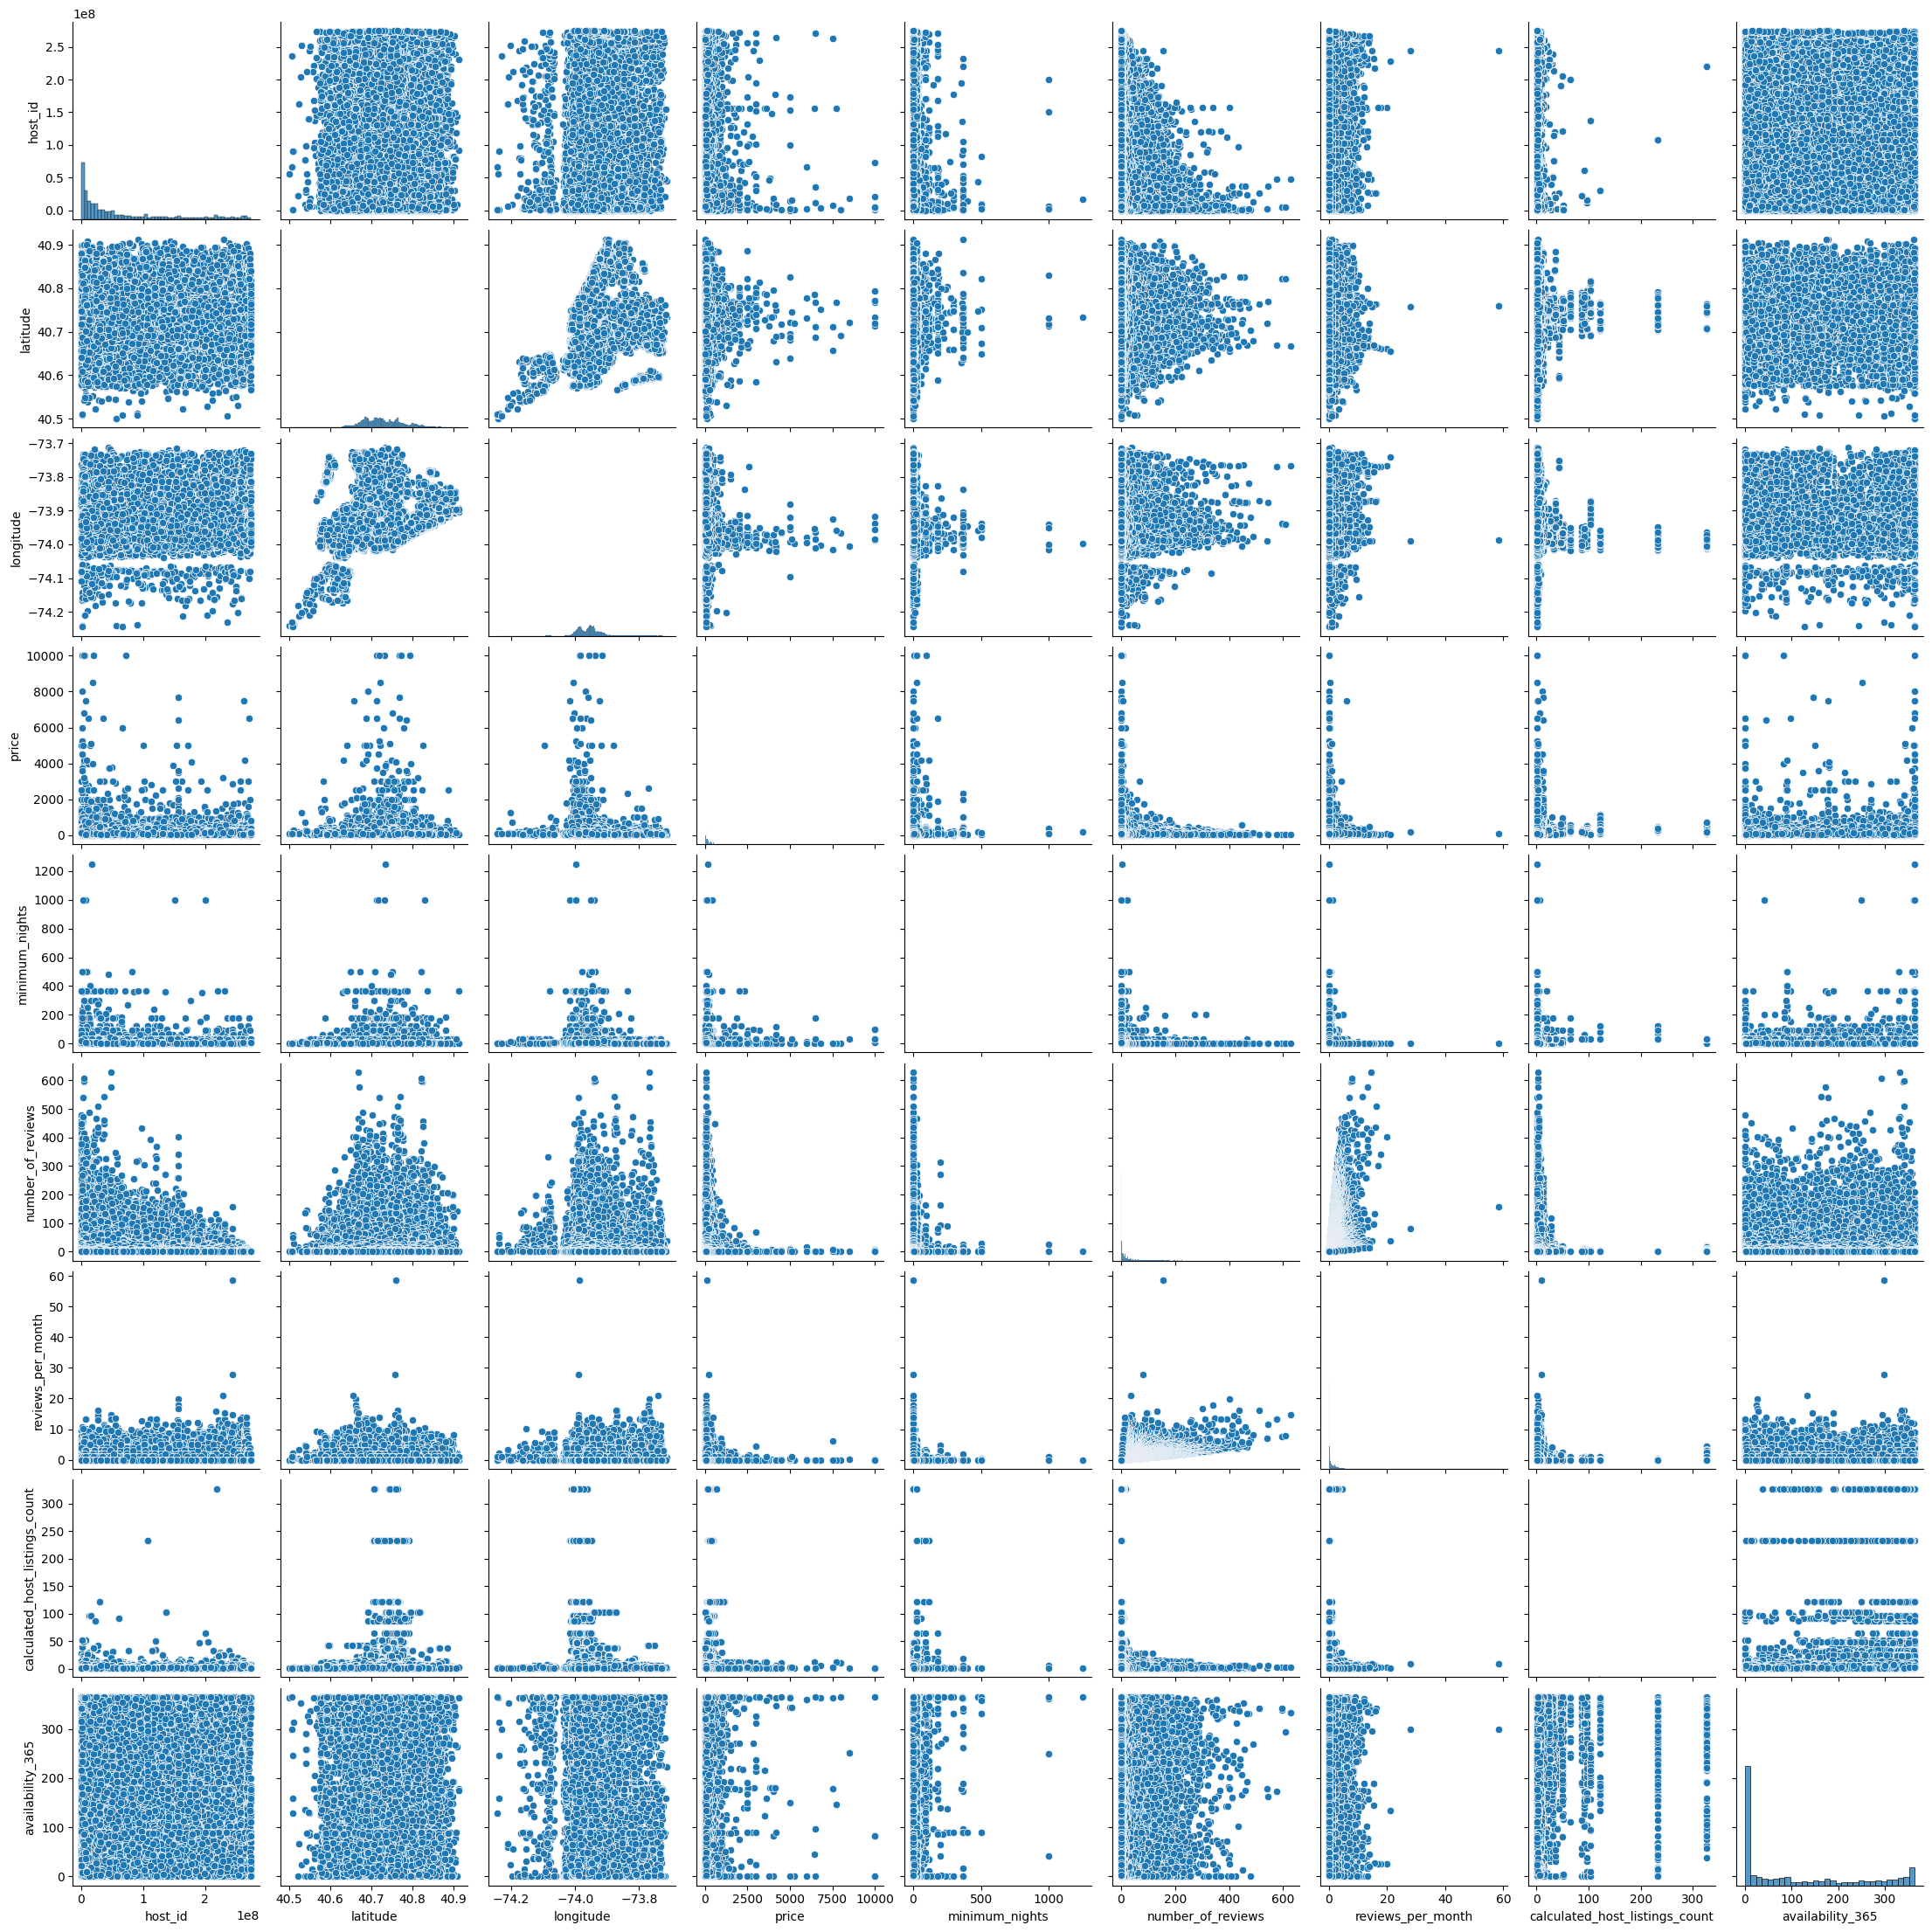

In [ ]:
# Pair Plot visualization code
sns.pairplot(df)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ? 
Explain Briefly.

Answer Here.

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***